In [1]:
import pandas as pd
train_data = pd.read_excel('01 Train Data.xlsx')
test_data = pd.read_excel('02 Test Data.xlsx')
train_data.head(3)

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,aniket@xyz.com,1,NaN,Art of Resume Building,2.213855e+09,NaN,Free Order,USD,0,...,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,NaN,6.7,2,5,Placed
1,Dhanshree,dhanshree@xyz.com,1,NaN,Art of Resume Building,2.213859e+09,NaN,Free Order,USD,0,...,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,NaN,8.2,3,2,Not placed
2,Dhiraj,dhiraj@xyz.com,1,NaN,Art of Resume Building,2.213862e+09,NaN,Free Order,USD,0,...,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,NaN,6.5,4,3,Not placed


In [2]:
train_data=train_data.drop_duplicates()
train_data.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Price Tier                                                         4894
Ticket Type                                                           0
Attendee #                                                          404
Group                                                              4894
Order Type                                                            0
Currency                                                            404
Total Paid                                                            0
Fees Paid                                                           404
Eventbrite Fees                                                       0
Eventbrite Payment Processing                                         0
Attendee Status                                                 

In [3]:
train_data['Placement Status'] = train_data['Placement Status'].astype(object).fillna(" ")
print(train_data.shape)
train_data['Placement Status'].isnull().sum()

(4894, 23)


np.int64(0)

In [4]:
train_data=train_data.drop(["Attendee #","Price Tier","Group","Currency","Email ID","How did you come to know about this event?",
                            "Specify in \"Others\" (how did you come to know about this event)","Ticket Type","First Name"],axis=1)

In [5]:
num=[]
cat=[]
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [6]:
for i in cat:
    print(i,end=":")
    print(train_data[i].unique())

Order Type:['Free Order' 'Other' 'Paid with Check']
Attendee Status:['Attending' 'NAN']
College Name:['D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE'
 'AP SHAH INSTITUTE OF TECHNOLOGY '
 'Don Bosco College of Engineering Fatorda Goa'
 'Pillai College of Engineering New Panvel' "St Xavier's College "
 'Vidyalankar Institute of Technology, Mumbai'
 'S.I.E.S. Graduate School Of Technology, Nerul, Navi Mumbai'
 'G H Raisoni institut of engineering and technology pune'
 'GOVERNMENT POLYTECHNIC GANDHINAGAR'
 'B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan'
 'Vishwakarma Institute of Technology, Pune'
 "KLE Society's College of BCA, RLS Institute, Belagavi"
 'Priyadarshini college of engineering, Nagpur '
 'St.Francis Institute of Technology'
 'New horizon institute of Technology and Management '
 'Late G. N. Sapkal College Of Engineering'
 'Symbiosis Institute of Technology, Pune'
 'MIT Academy Of Engineering ,Alandi' 'A. C. Patil College of Engineering'
 'Wilso

In [7]:
train_data.groupby('College Name')['College Name'].agg('count').sort_values(ascending=True)

College Name
AP SHAH INSTITUTE OF TECHNOLOGY                                                        6
D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE                                  6
na                                                                                     6
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]     14
S.I.E.S. Graduate School Of Technology, Nerul, Navi Mumbai                            16
LOKMANYA TILAK COLLEGE OF ENGINEERING KOPARKHAIRANE NAVI MUMBAI                       18
d y patil institute of mca and management akurdi pune                                 20
ap shah institute of technology                                                       20
Silicon Institute of Technology                                                       22
CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI        22
ADHIYAMAAN COLLEGE OF ENGINEERING                                                     22
Pillai C

In [8]:
# Standardize 'College Name' column by converting all names to lowercase
train_data['College Name'] = train_data['College Name'].str.lower()
# Group by 'College Name' and count the occurrences
college_counts = train_data.groupby('College Name')['College Name'].agg('count').sort_values(ascending=True)
print(college_counts)

College Name
na                                                                                     6
ap shah institute of technology                                                       26
d y patil institute of mca and management akurdi pune                                 26
thakur institute of management studies, career development & research - [timscdr]     79
s.i.e.s. graduate school of technology, nerul, navi mumbai                            84
lokmanya tilak college of engineering koparkhairane navi mumbai                       99
chhattisgarh swami vivekananda technical university teaching department bhilai       144
adhiyamaan college of engineering                                                    144
silicon institute of technology                                                      144
st xavier's college                                                                  166
don bosco college of engineering fatorda goa                                         170
pillai c

In [9]:
train_data['College Name'] = train_data['College Name'].astype(object).fillna("Unknown")

In [10]:
train_data=train_data.drop(["Order Type","Attendee Status"],axis=1)

In [11]:
for i in num:
    print(i,end=":")
    print(train_data[i].unique())

Quantity:[1]
Total Paid:[0]
Fees Paid:[ 0. nan]
Eventbrite Fees:[0]
Eventbrite Payment Processing:[0]
CGPA:[6.7 8.2 6.5 8.7 9.1 8.9 7.4 7.3 8.6 9.2 7.8 7.9 9.9 8.1 9.5 9.8 9.6 6.2
 7.2 6.8 8.4 6.6 7.6 8.3 6.3 8.5 8.8 7.5 6.4 7.7 6.9 9.  9.7 9.3 9.4 7.1
 8. ]
Speaking Skills:[2 3 4 5 1]
ML Knowledge:[5 2 3 4 1]


In [12]:
train_data=train_data.drop(["Quantity","Total Paid","Eventbrite Fees","Eventbrite Payment Processing","Fees Paid"],axis=1)

In [13]:
train_data.groupby('Year of Graduation')['Year of Graduation'].agg('count').sum

<bound method Series.sum of Year of Graduation
2012                             1
10pass                           1
1999                             1
2000                             2
2001                             2
2009                             1
2011                             1
2013                             1
2015                             1
2016                             4
2017                             3
2018                             2
2019                             5
2020                            53
2021                           304
2022                           219
2023                           153
2024                             7
AISSMS                           1
B.Tech                           2
BR                               1
Bachelor of Engineering          6
Final Year                      11
Fourth Year                     36
Friend                           1
Last Year                        1
Pursuing                         8
Second y

In [14]:
#test to check whether the above unique  values contribute to result
tf1 = pd.read_excel('01 Train Data.xlsx')
tf1.dropna(subset=['Placement Status'], inplace=True)
tf1.shape
tf1.groupby('Year of Graduation')['Year of Graduation'].agg('count').sum

<bound method Series.sum of Series([], Name: Year of Graduation, dtype: int64)>

In [15]:
#By comparing the above unique values with placement status we can say that all of them lead to blank values
#Therefore we can remove this column
train_data=train_data.drop(["Year of Graduation"],axis=1)

In [16]:
num=[]
cat=[]
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [17]:
print(train_data.shape)
train_data.isnull().sum()

(4894, 6)


College Name        0
Designation         0
CGPA                0
Speaking Skills     0
ML Knowledge        0
Placement Status    0
dtype: int64

In [18]:
cat
# Designation because other than student role no other type is placed

['College Name', 'Designation', 'Placement Status']

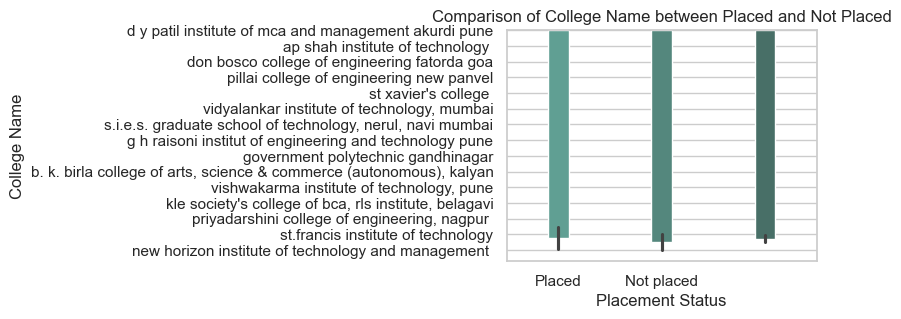

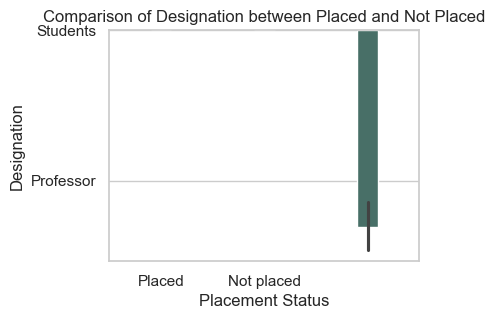

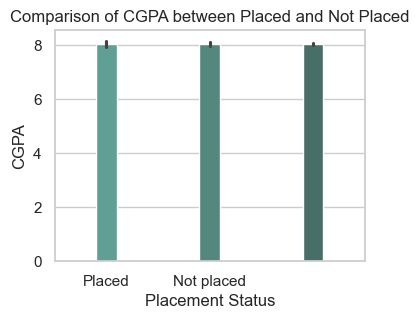

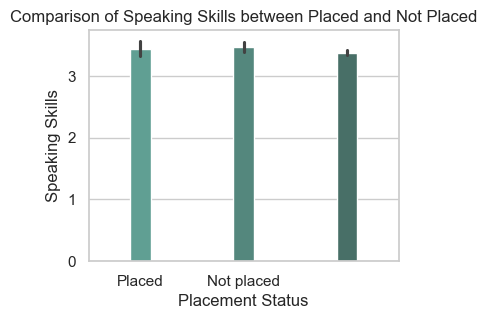

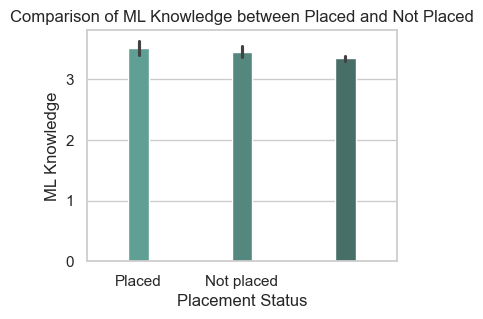

In [19]:
import warnings  
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
feature = ['College Name','Designation','CGPA','Speaking Skills','ML Knowledge']
for i in feature:
    plt.figure(figsize=(4, 3))
    custom_palette = sns.color_palette("dark:#5A9_r")
    sns.barplot(x='Placement Status', y=i, data=train_data,  palette=custom_palette,width=0.2)

    plt.xlabel('Placement Status')
    plt.ylabel(f'{i}')
    plt.title(f'Comparison of {i} between Placed and Not Placed')

    plt.show()

In [21]:
import warnings  
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
train_data['College Name'] = label_encoder.fit_transform(train_data['College Name'])
train_data['Designation'] = label_encoder.fit_transform(train_data['Designation'])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data.drop('Placement Status', axis=1))

In [22]:
X = train_data.drop(columns=['Placement Status'])
y = train_data['Placement Status']

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
X_test = test_data.drop(['Placement Status'],axis=1)
y_test = train_data['Placement Status']
y_pred = model.predict(X)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.7752349816101348
Confusion Matrix: [[3793    0    3]
 [ 732    0    0]
 [ 365    0    1]]


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
# Assuming data is already preprocessed as done earlier
X = train_data.drop('Placement Status', axis=1)
y = train_data['Placement Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#To prevent underfitting as in prev case
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# Initialize models
Regression = LogisticRegression()
decision_tree = DecisionTreeClassifier(max_depth=500,random_state=42)
random_forest = RandomForestClassifier(n_estimators=1000,random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=1000,random_state=42)
adaboost = AdaBoostClassifier(n_estimators=1000,random_state=42)

# Train models
Regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
adaboost.fit(X_train, y_train)

# Make predictions
lgr_predictions=Regression.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
gb_predictions = gradient_boosting.predict(X_test)
ab_predictions = adaboost.predict(X_test)

# Evaluate models
def evaluate_model(y_test, predictions, model_name):
    print(f"Performance of {model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("\n")

# Evaluate each model
evaluate_model(y_test, lgr_predictions, "Logistic Regression")
evaluate_model(y_test, dt_predictions, "Decision Tree")
evaluate_model(y_test, rf_predictions, "Random Forest")
evaluate_model(y_test, gb_predictions, "Gradient Boosting")
evaluate_model(y_test, ab_predictions, "AdaBoost")

Performance of Logistic Regression:
Accuracy: 0.34831460674157305
Confusion Matrix:
 [[268 149 322]
 [ 40  31  83]
 [ 19  25  42]]
Classification Report:
               precision    recall  f1-score   support

                   0.82      0.36      0.50       739
  Not placed       0.15      0.20      0.17       154
      Placed       0.09      0.49      0.16        86

    accuracy                           0.35       979
   macro avg       0.35      0.35      0.28       979
weighted avg       0.65      0.35      0.42       979



Performance of Decision Tree:
Accuracy: 0.6465781409601634
Confusion Matrix:
 [[601  99  39]
 [117  26  11]
 [ 67  13   6]]
Classification Report:
               precision    recall  f1-score   support

                   0.77      0.81      0.79       739
  Not placed       0.19      0.17      0.18       154
      Placed       0.11      0.07      0.08        86

    accuracy                           0.65       979
   macro avg       0.35      0.35      0.3

In [25]:
train_data.columns

Index(['College Name', 'Designation', 'CGPA', 'Speaking Skills',
       'ML Knowledge', 'Placement Status'],
      dtype='object')

In [26]:
td=test_data[['College Name', 'Designation', 'CGPA', 'Speaking Skills',
       'ML Knowledge']]

In [27]:
td.isnull().sum()

College Name       1
Designation        0
CGPA               0
Speaking Skills    0
ML Knowledge       0
dtype: int64

In [28]:
td['College Name'] = td['College Name'].str.lower()
td['College Name'] = td['College Name'].astype(object).fillna("Unknown")

In [29]:
td['College Name'] = label_encoder.fit_transform(td['College Name'])
td['Designation'] = label_encoder.fit_transform(td['Designation'])
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(td)

In [30]:
y_pred_final = gradient_boosting.predict(td)

In [31]:
print(y_pred_final)

[' ' ' ' ' ' ... ' ' ' ' ' ']


In [32]:
results = test_data.copy()
results['Predicted Placement'] = y_pred_final

# Saving to Excel
results.to_excel('placement_predictions.xlsx', index=False)

In [33]:
pred= pd.read_excel('placement_predictions.xlsx')
pred['Predicted Placement'].value_counts()

Predicted Placement
              3610
Not placed     133
Placed          53
Name: count, dtype: int64